In [1]:
from connection import engine
import pandas as pd
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


Successfully connected to Snowflake


In [2]:
def fetch_cleaned_data():
    with engine.connect() as conn:
        df = pd.read_sql("SELECT * FROM crypto_market_cleaned;", conn)
    return df

df = fetch_cleaned_data()

In [3]:
df

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,82870.000000,1648762403249,1,1648762403249,5.673585e+10,87791.000000,82277.000000,...,1.984587e+07,1.984587e+07,2.100000e+07,108786.00,-23.66032,2025-01-20T09:11:54.494Z,67.810000,1.223712e+05,2013-07-06T00:00:00.000Z,2025-04-03 12:07:04.671
1,ethereum,eth,Ethereum,1791.020000,216571537533,2,216571537533,2.531752e+10,1934.100000,1787.860000,...,1.206644e+08,1.206645e+08,0.000000e+00,4878.26,-63.21902,2021-11-10T14:24:19.604Z,0.432979,4.143018e+05,2015-10-20T00:00:00.000Z,2025-04-03 12:06:57.337
2,tether,usdt,Tether,0.999769,144001534362,3,144001534362,8.331170e+10,1.000000,0.999644,...,1.440343e+11,1.440343e+11,0.000000e+00,1.32,-24.43664,2018-07-24T00:00:00.000Z,0.572521,7.462682e+01,2015-03-02T00:00:00.000Z,2025-04-03 12:06:58.056
3,ripple,xrp,XRP,2.030000,118284939947,4,203191002077,6.299024e+09,2.190000,2.000000,...,5.820570e+10,9.998630e+10,1.000000e+11,3.40,-40.24346,2018-01-07T00:00:00.000Z,0.002686,7.550089e+04,2014-05-22T00:00:00.000Z,2025-04-03 12:06:53.977
4,binancecoin,bnb,BNB,592.010000,86546598204,5,86546598204,1.864669e+09,611.360000,584.990000,...,1.458876e+08,1.458876e+08,2.000000e+08,788.84,-24.81959,2024-12-04T10:35:25.220Z,0.039818,1.489328e+06,2017-10-19T00:00:00.000Z,2025-04-03 12:07:04.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,injective-protocol,inj,Injective,8.150000,798598732,96,817171233,9.010431e+07,9.050000,8.130000,...,9.772722e+07,1.000000e+08,0.000000e+00,52.62,-84.46131,2024-03-14T15:06:22.124Z,0.657401,1.143771e+03,2020-11-03T16:19:30.576Z,2025-04-03 12:07:00.171
96,sei-network,sei,Sei,0.161352,789595741,97,1617241583,1.325664e+08,0.177153,0.160791,...,4.882361e+09,1.000000e+10,0.000000e+00,1.14,-85.82765,2024-03-16T02:30:23.904Z,0.095364,6.937753e+01,2023-10-19T08:05:30.655Z,2025-04-03 12:07:02.122
97,the-graph,grt,The Graph,0.080912,774668628,98,875226573,5.390254e+07,0.089755,0.080758,...,9.548532e+09,1.078800e+10,1.078800e+10,2.84,-97.14360,2021-02-12T07:28:45.775Z,0.052051,5.593284e+01,2022-11-22T10:05:03.503Z,2025-04-03 12:06:57.016
98,theta-token,theta,Theta Network,0.769255,769864199,99,769864199,3.255087e+07,0.849618,0.766302,...,1.000000e+09,1.000000e+09,1.000000e+09,15.72,-95.09965,2021-04-16T13:15:11.190Z,0.040400,1.806745e+03,2020-03-13T02:24:16.483Z,2025-04-03 12:06:56.403


In [4]:
# convert to dask dataframe
ddf = dd.from_pandas(df, npartitions=4)

In [5]:
# Select Features & Target
features = ["market_cap", "total_volume", "circulating_supply"]
target = "price_change_percentage_24h"


In [6]:

# split data 
X_train, X_test, y_train, y_test = train_test_split(ddf[features],ddf[target], test_size = 0.2,random_state=42)

# Convert to Pandas for Training
X_train, X_test, y_train, y_test = X_train.compute(), X_test.compute(), y_train.compute(), y_test.compute()

c:\Users\DHANYATHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask_ml\model_selection\_split.py:464: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(


In [7]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Prediction
predictions = model.predict(X_test)

In [9]:
# Evaluate the Model
err = mean_absolute_error(y_test, predictions)
print(f"Model trained! MAE: {err:.4f}")

Model trained! MAE: 3.1374


In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_true = y_test  
y_pred = predictions 
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")

RMSE: 3.609390750524681


In [11]:
# Since our data is small and EMA is too high for that we need to normalize the data to a standard 
# that it get high accuracy predicting the model
#  Mean of 0 and a Standard Deviation of 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print(f"Target Min: {y_test.min()}, Target Max: {y_test.max()}")
print(f"Mean Target Value: {y_test.mean()}")

Target Min: -13.07531, Target Max: -0.00193
Mean Target Value: -4.397769000000001


### Still Even though Scalarized the model we are seeing MAE (3.1374) and RMSE (3.6094) are quite high 

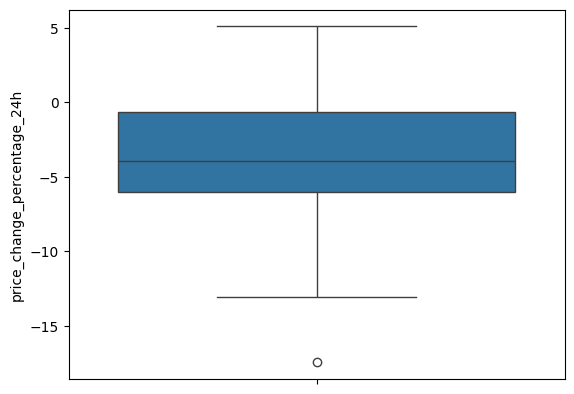

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=y_train)
plt.show()

In [14]:
# Remove the outliers
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
y_train_filtered = y_train[~((y_train < (Q1 - 1.5 * IQR)) | (y_train > (Q3 + 1.5 * IQR)))]


## Lets Use Random ForestRegression 

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_error = mean_absolute_error(y_test, rf_predictions)

print(f"🌲 Random Forest MAE: {rf_error:.4f}")

🌲 Random Forest MAE: 2.6246


In [16]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_error = mean_absolute_error(y_test, xgb_predictions)

print(f"⚡ XGBoost MAE: {xgb_error:.4f}")

⚡ XGBoost MAE: 2.9067


##### Hyperparameter Tuning for Random Forest Use Grid Search to find the best settings:

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 10, 20],  
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)

best_rf = grid_search.best_estimator_
best_prediction = best_rf.predict(X_test)

best_mae = mean_absolute_error(y_test, best_prediction)
print(f"🔥 Best Random Forest MAE: {best_mae:.4f}")

🔥 Best Random Forest MAE: 2.7595


In [18]:
X_test["predicted_price_change"] = rf_predictions

In [19]:
X_test.describe()

,market_cap,total_volume,circulating_supply,predicted_price_change
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000
mean,1.153928e+10,1.173625e+09,2.105037e+13,-3.152883
std,2.263141e+10,3.216248e+09,9.406541e+13,1.895638
min,7.746686e+08,3.439065e+06,1.473598e+04,-8.015756
25%,1.171054e+09,1.873730e+07,1.121819e+08,-4.240215
50%,2.714357e+09,6.157441e+07,2.124991e+09,-3.422703
75%,4.827764e+09,1.123902e+09,1.863184e+10,-1.973965
max,8.654660e+10,1.453249e+10,4.206900e+14,-0.026919


In [20]:
# Check your y_train and y_test values. If most actual values are negative, the model is just following the pattern.
print(y_train.describe())
print(y_test.describe())

count    80.000000
mean     -3.943474
std       3.764290
min     -17.463330
25%      -6.037175
50%      -3.956330
75%      -0.664040
max       5.109160
Name: price_change_percentage_24h, dtype: float64
count    20.000000
mean     -4.397769
std       3.667131
min     -13.075310
25%      -6.929600
50%      -3.015250
75%      -1.756573
max      -0.001930
Name: price_change_percentage_24h, dtype: float64


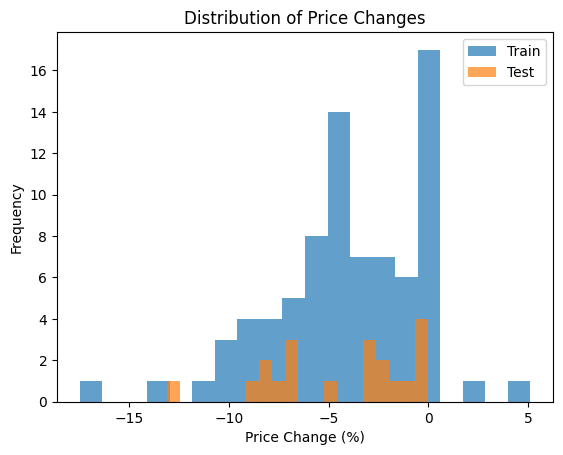

In [21]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=20, alpha=0.7, label="Train")
plt.hist(y_test, bins=20, alpha=0.7, label="Test")
plt.legend()
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Price Changes")
plt.show()


#### Since our dataset is highly skewed towards negative price changes, our model is predicts negative values. To ensure the model can predict both positive and negative price changes, we can use SMOTE (Synthetic Minority Over-sampling Technique).

In [22]:
from imblearn.over_sampling import SMOTE

# Create bins for price change percentage
y_train_binned = pd.qcut(y_train, q=3, labels=False)  # Splitting into 3 quantiles

# Apply SMOTE on the binned target
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_binned)

# Convert y_train_resampled back to continuous values using the original y_train distribution
y_train_resampled = y_train.sample(len(y_train_resampled), replace=True).reset_index(drop=True)


In [23]:
y_train_resampled

0      2.40390
1     -5.11433
2     -4.68795
3     -0.12913
4     -0.01538
        ...   
76    -3.97745
77    -5.55830
78   -17.46333
79     2.40390
80   -10.46963
Name: price_change_percentage_24h, Length: 81, dtype: float64

### Still the data is sweked with negetive value lets agument the data

In [24]:

# Select only positive price changes
positive_samples = X_train[y_train > 0]
positive_labels = y_train[y_train > 0]

# Generate synthetic samples by adding noise
noise = np.random.normal(0, 0.1, positive_samples.shape)  # Add slight noise
synthetic_X = positive_samples + noise
synthetic_y = positive_labels + np.random.normal(0, 0.1, positive_labels.shape)

# Combine with original data
X_train_balanced = pd.concat([X_train, synthetic_X])
y_train_balanced = pd.concat([y_train, synthetic_y])

# Shuffle the dataset
from sklearn.utils import shuffle
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)


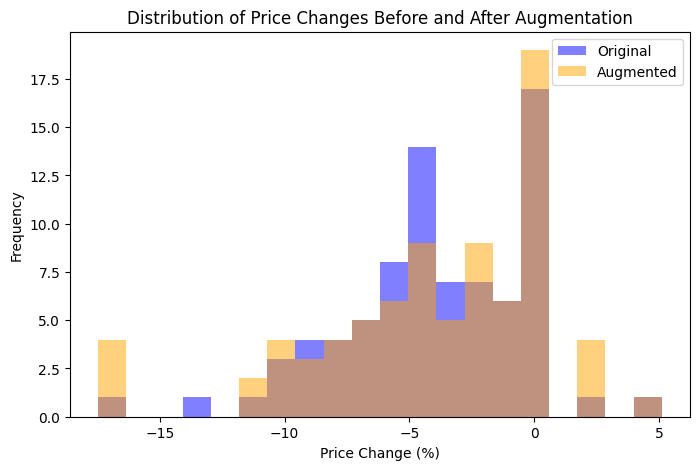

In [25]:


import matplotlib.pyplot as plt  

plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=20, alpha=0.5, label="Original", color="blue")
plt.hist(y_train_resampled, bins=20, alpha=0.5, label="Augmented", color="orange")
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Price Changes Before and After Augmentation")
plt.show()


In [26]:
# Ensure both datasets have the same feature names
common_features = X_train_resampled.columns.intersection(X_test.columns)

# Select only those features
X_train_resampled = X_train_resampled[common_features]
X_test = X_test[common_features]

# Train the model again
model.fit(X_train_resampled, y_train_resampled)

# Predict on test data  
predictions = model.predict(X_test)

# Evaluate performance  
mae = mean_absolute_error(y_test, predictions)
print(f"🔥 New Random Forest MAE: {mae:.4f}")



🔥 New Random Forest MAE: 3.2591


In [28]:
# Apply log transformation (adding 1 to avoid log(0))
X_train_resampled['circulating_supply_log'] = np.log1p(X_train_resampled['circulating_supply'])
X_test['circulating_supply_log'] = np.log1p(X_test['circulating_supply'])

# Drop the original feature
X_train_resampled.drop(columns=['circulating_supply'], inplace=True)
X_test.drop(columns=['circulating_supply'], inplace=True)

In [29]:
X_train_resampled.drop(columns=['total_volume'], inplace=True)
X_test.drop(columns=['total_volume'], inplace=True)

# Retrain the model
model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
predictions = model.predict(X_test)

# Evaluate performance
new_mae = mean_absolute_error(y_test, predictions)
print(f"🔥 New MAE after removing 'total_volume': {new_mae}")

🔥 New MAE after removing 'total_volume': 3.1966771171446284


In [30]:
X_test["predicted_price_change"] = rf_predictions


In [ ]:
rf_predictions

array([-4.2337188, -4.0223904, -2.934321 , -4.2597053, -3.9110851,
       -0.5688614, -4.1650271, -0.0269188, -5.0996195, -0.5832014,
       -0.9821046, -2.7744368, -8.0157561, -4.2962347, -2.6906408,
       -1.4949743, -2.4558272, -3.9520471, -2.1336285, -4.4571621])

In [38]:


selected_features = ["market_cap", "circulating_supply_log"]  # Use the transformed feature name
X_test = X_test[selected_features]

predictions = model.predict(X_test)

In [39]:
predictions

array([-3.85727147, -3.76210512, -3.8861714 , -3.93698823, -4.08473136,
       -4.2037013 , -3.70539574, -4.23843675, -4.49185087, -4.2289187 ,
       -4.2146412 , -4.03224055, -4.0919788 , -4.0763774 , -4.52592325,
       -4.15074602, -4.0577068 , -4.31518054, -4.15856101, -4.07555615])

In [43]:
print("X_train columns:", list(X_train.columns))
print("X_test columns:", list(X_test.columns))


X_train columns: ['market_cap', 'total_volume', 'circulating_supply']
X_test columns: ['market_cap', 'total_volume', 'circulating_supply']


In [44]:
import numpy as np

# Ensure X_test has the same feature transformations as X_train
X_test = X_test.copy()

# Apply log transformation if needed (must match training phase)
if "circulating_supply" in X_test.columns:
    X_test["circulating_supply_log"] = np.log1p(X_test["circulating_supply"])  # Apply log transform
    X_test.drop(columns=["circulating_supply"], inplace=True)  # Remove raw column

# Ensure X_test has only the features used during model training
X_test = X_test.reindex(columns=model.feature_names_in_, fill_value=0)  # Align with model's expected features

# Get symbols corresponding to test indices
symbol_column = df.loc[X_test.index, "symbol"].reset_index(drop=True)

# Convert predictions to DataFrame
predictions_df = pd.DataFrame({
    "symbol": symbol_column,  # Fetch symbols from original data
    "actual_price_change": y_test.reset_index(drop=True),  # Ensure alignment
    "predicted_price_change": model.predict(X_test)  # Model prediction
})

# Save predictions to Snowflake
predictions_df.to_sql(
    "crypto_market_predictions",
    con=engine,
    if_exists="replace",  # Replace existing table if exists
    index=False
)

print("✅ AI Predictions successfully saved to Snowflake!")


✅ AI Predictions successfully saved to Snowflake!


In [45]:
# lets save the model
! pip install joblib



In [46]:
import joblib

# Assuming `model` is your trained scikit-learn model
joblib.dump(model, "crypto_price_predictor.pkl")
print("✅ Model saved successfully as 'crypto_price_predictor.pkl'")

✅ Model saved successfully as 'crypto_price_predictor.pkl'


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test = actual values, y_pred = predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"📊 Model Performance Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Model Performance Metrics:
MAE: 3.1374
MSE: 13.0277
RMSE: 3.6094
R² Score: -0.0197


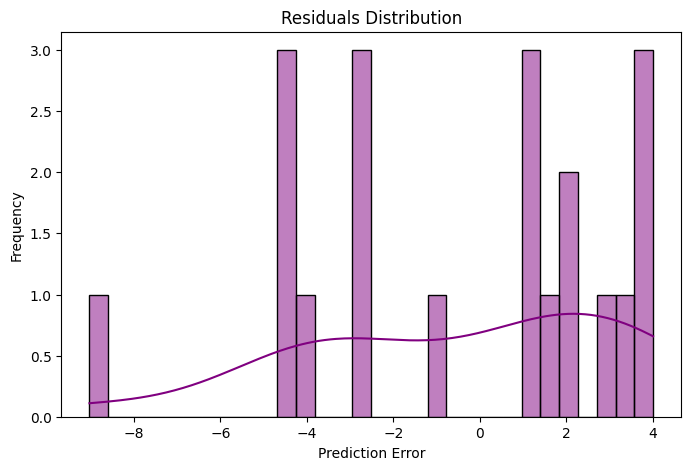

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()
